In [1]:
# from IPython.display import Image
# Image(url = "https://cdn.shopify.com/s/files/1/1707/4781/files/Mushroom_LifeCycle_600x600.jpg?v=1626873700")

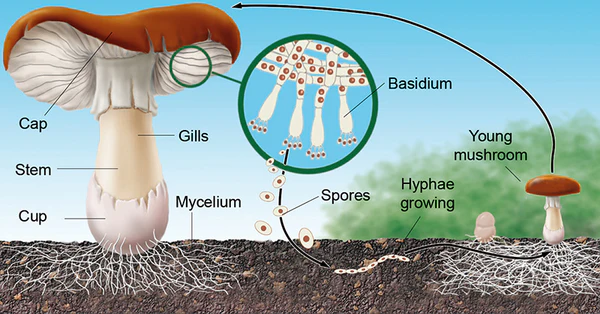

In [2]:
import pandas as pd

In [3]:
column_names = ["classes", "cap shape", "cap surface", "cap color", "bruise", "odor",
                "gill attachment", "gill spacing", "gill size", "gill color", 
                "stalk shape", "stalk root", "stalk surface above ring", "stalk surface below ring",
                "stalk color above ring", "stalk color below ring", "veil type", 
                "veil color", "ring number", "ring type", "spore print color", 
                "population", "habitat"]
mushroom = pd.read_csv("agaricus-lepiota.data", names = column_names, header = None)
mushroom.head()

,classes,cap shape,cap surface,cap color,bruise,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


0. classes: edible=e, poisonous=p
1. cap shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises?: bruises=t, no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill attachment: attached=a, descending=d, free=f, notched=n
7. gill spacing: close=c, crowded=w, distant=d
8. gill size: broad=b, narrow=n
9. gill color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk shape: enlarging=e, tapering=t
11. stalk root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk surface above ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk surface below ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk color above ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk color below ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. veil type: partial=p, universal=u
17. veil color: brown=n, orange=o, white=w, yellow=y
18. ring number: none=n, one=o, two=t
19. ring type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore print color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [4]:
# create a dictionary to convert letters in columns into something more meaningful

attributes = {"classes": {"p": "poisonous", "e": "edible"},
              "cap shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat","k": "knobbed", "s": "sunken"},
              "cap surface" : {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
              "cap color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", 
                            "u": "purple","e": "red", "w": "white", "y": "yellow"},
              "bruise": {"t": "true", "f": "false"},
              "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", 
                       "n": "none", "p": "pungent", "s": "spicy"},
              "gill attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
              "gill spacing": {"c": "close", "w": "crowded", "d": "distant"},
              "gill size": {"b": "broad", "n": "narrow"},
              "gill color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", 
                             "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", 
                             "w": "white", "y": "yellow"},
              "stalk shape": {"e": "enlarging", "t": "tapering"},
              "stalk root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", 
                             "r": "rooted", "?": "missing"},
              "stalk surface above ring": {"f": "fibrous","y": "scaly", "k": "silky", "s": "smooth"},
              "stalk surface below ring":{"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
              "stalk color above ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", 
                                         "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "stalk color below ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", 
                                         "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
              "veil type": {"p": "partial", "u": "universal"},
              "veil color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
              "ring number": {"n": "none", "o": "one", "t": "two"},
              "ring type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none",
                            "p": "pendant", "s": "sheathing", "z": "zone"},
              "spore print color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green",
                                    "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
              "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", 
                             "v": "several", "y": "solitary"},
              "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", 
                          "w": "waste", "d": "woods"}
             }

In [5]:
# loop through columns and map them
for col in mushroom.columns:
    mushroom[col] = mushroom[col].map(attributes[col])

In [6]:
mushroom.shape

(8124, 23)

In [7]:
mushroom.isnull().sum()

classes                     0
cap shape                   0
cap surface                 0
cap color                   0
bruise                      0
odor                        0
gill attachment             0
gill spacing                0
gill size                   0
gill color                  0
stalk shape                 0
stalk root                  0
stalk surface above ring    0
stalk surface below ring    0
stalk color above ring      0
stalk color below ring      0
veil type                   0
veil color                  0
ring number                 0
ring type                   0
spore print color           0
population                  0
habitat                     0
dtype: int64

In [8]:
mushroom.duplicated().sum()

0

In [9]:
mushroom.describe().T

,count,unique,top,freq
classes,8124,2,edible,4208
cap shape,8124,6,convex,3656
cap surface,8124,4,scaly,3244
cap color,8124,10,brown,2284
bruise,8124,2,false,4748
odor,8124,9,none,3528
gill attachment,8124,2,free,7914
gill spacing,8124,2,close,6812
gill size,8124,2,broad,5612
gill color,8124,12,buff,1728


In [10]:
for col in mushroom.columns:
    print(mushroom[col].value_counts())

edible       4208
poisonous    3916
Name: classes, dtype: int64
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap shape, dtype: int64
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap surface, dtype: int64
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap color, dtype: int64
false    4748
true     3376
Name: bruise, dtype: int64
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64
free        7914
attached     210
Name: gill attachment, dtype: int64
close      6812
crowded    1312
Name: gill spacing, dtype: int64
broad     5612
narrow    2512
Name: gill size, dtype: int64
buff         1728
pink         1492
white        1202
brown        1048
gray          

In [11]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap shape                 8124 non-null   object
 2   cap surface               8124 non-null   object
 3   cap color                 8124 non-null   object
 4   bruise                    8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill attachment           8124 non-null   object
 7   gill spacing              8124 non-null   object
 8   gill size                 8124 non-null   object
 9   gill color                8124 non-null   object
 10  stalk shape               8124 non-null   object
 11  stalk root                8124 non-null   object
 12  stalk surface above ring  8124 non-null   object
 13  stalk surface below ring  8124 non-null   object
 14  stalk color above ring  

In [12]:
#from dataprep.eda import plot
#plot(mushroom)

In [13]:
#!pip install mplcursors

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
#%matplotlib widget
#%matplotlib nbagg
#import mplcursors

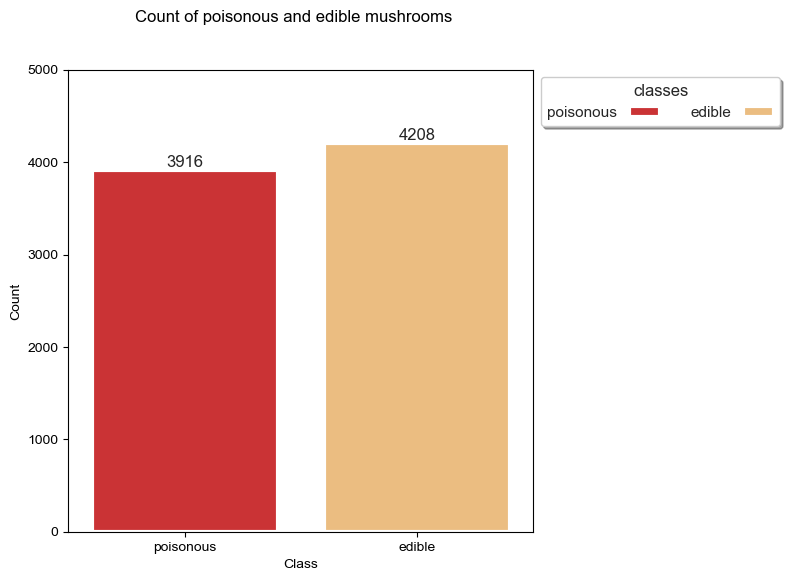

In [15]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Count of poisonous and edible mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["classes"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "classes", 
              linewidth = 3, hue = "classes", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Class")
axes.set_ylabel("Count")
plt.legend(title = "classes", 
           #labels = ["edible", "poisonous"], 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 5000)
plt.show()

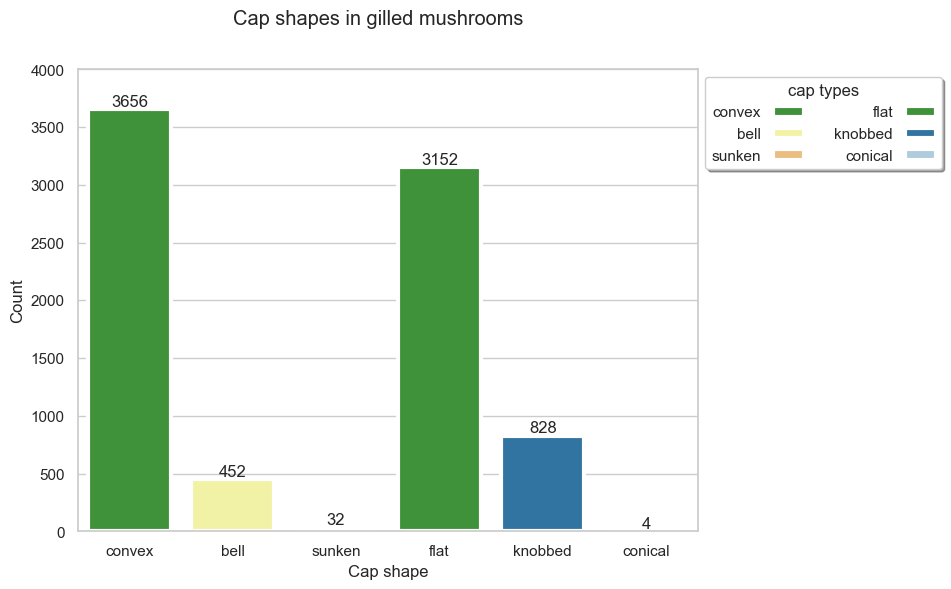

In [16]:
fig, axes = plt.subplots(figsize = (8, 6))
fig.suptitle("Cap shapes in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["cap shape"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "cap shape", 
              linewidth = 3, hue = "cap shape", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Cap shape")
axes.set_ylabel("Count")
plt.legend(title = "cap types", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 4000)
plt.show()

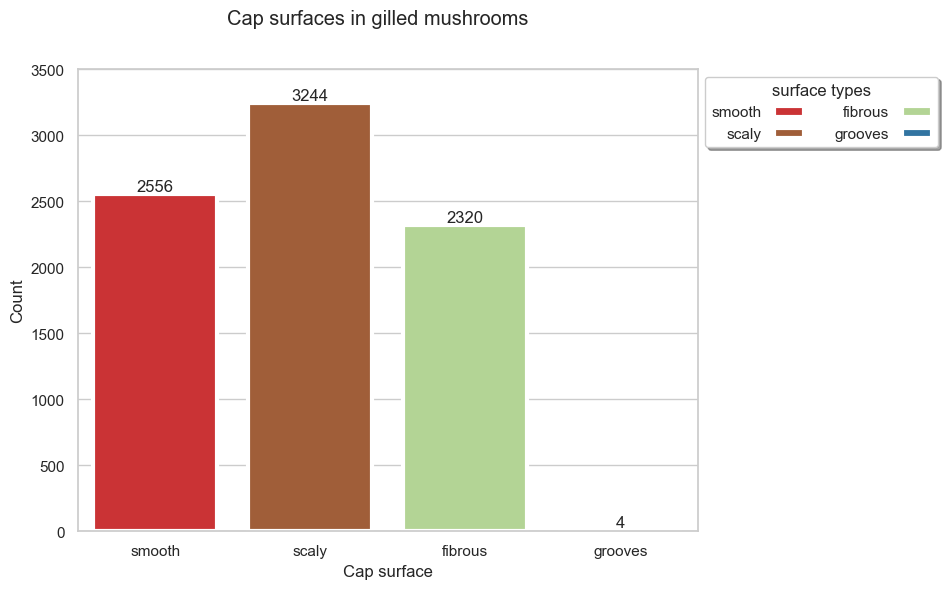

In [17]:
fig, axes = plt.subplots(figsize = (8, 6))
fig.suptitle("Cap surfaces in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["cap surface"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "cap surface", 
              linewidth = 3, hue = "cap surface", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Cap surface")
axes.set_ylabel("Count")
plt.legend(title = "surface types", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 3500)
plt.show()

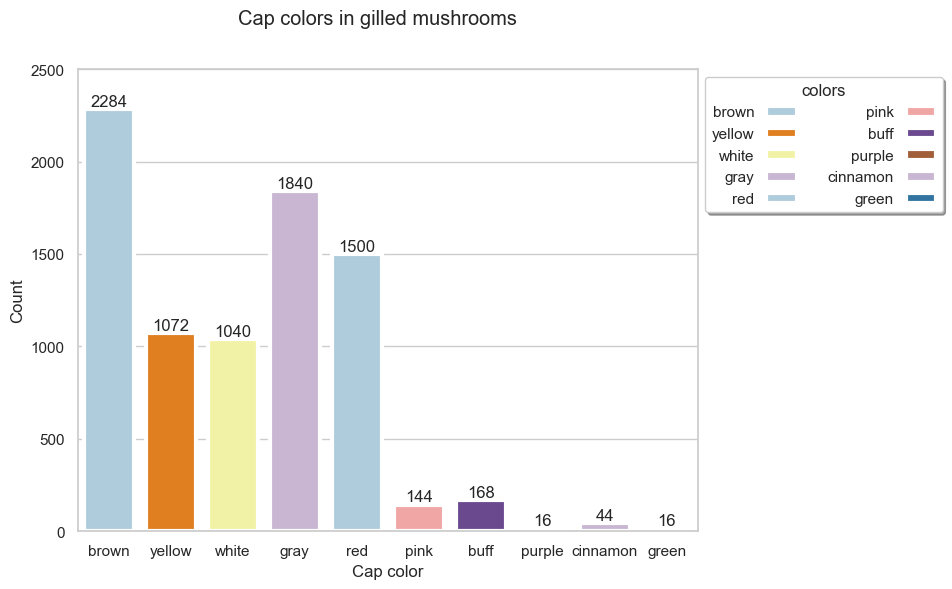

In [18]:
fig, axes = plt.subplots(figsize = (8, 6))
fig.suptitle("Cap colors in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["cap color"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "cap color", 
              linewidth = 3, hue = "cap color", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Cap color")
axes.set_ylabel("Count")
plt.legend(title = "colors", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 2500)
plt.show()

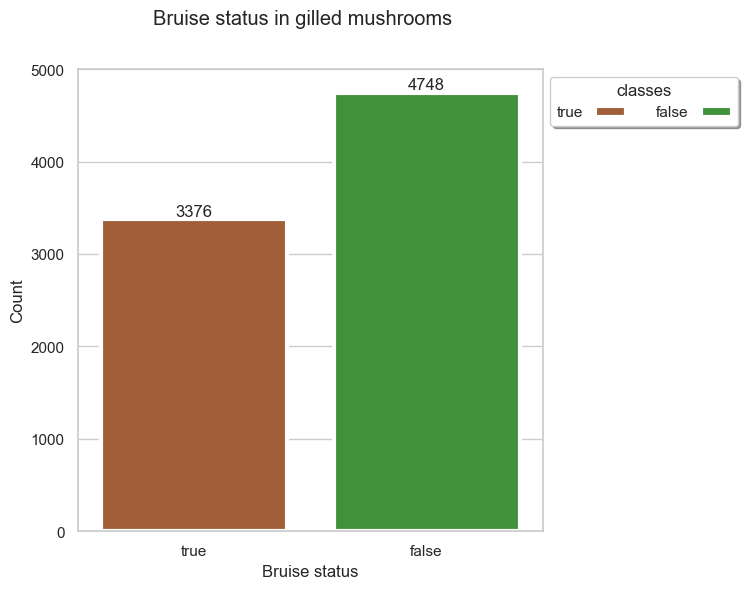

In [19]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Bruise status in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["bruise"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "bruise", 
              linewidth = 3, hue = "bruise", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Bruise status")
axes.set_ylabel("Count")
plt.legend(title = "classes", 
           #labels = ["edible", "poisonous"], 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 5000)
plt.show()

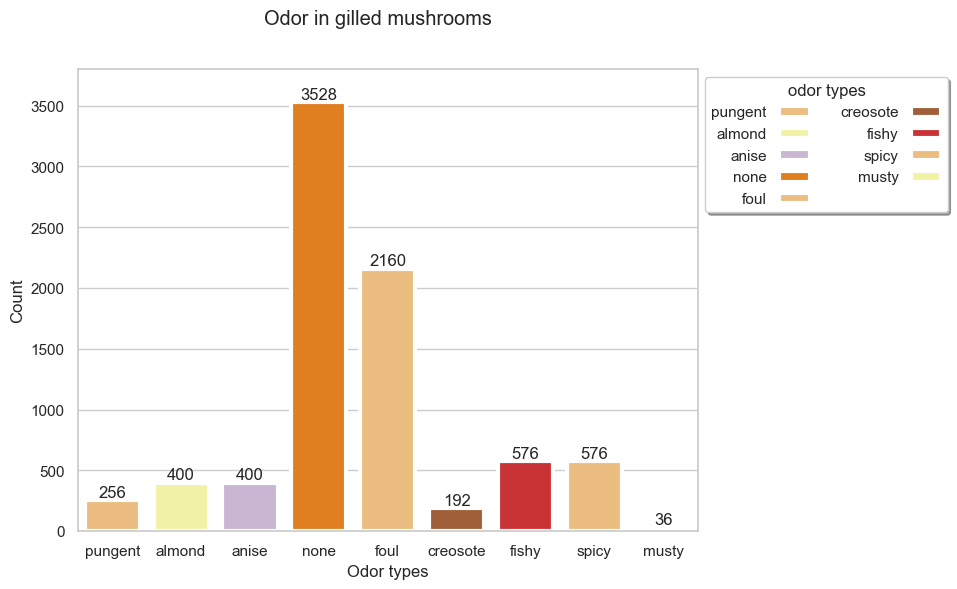

In [20]:
fig, axes = plt.subplots(figsize = (8, 6))
fig.suptitle("Odor in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["odor"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "odor", 
              linewidth = 3, hue = "odor", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Odor types")
axes.set_ylabel("Count")
plt.legend(title = "odor types", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 3800)
plt.show()

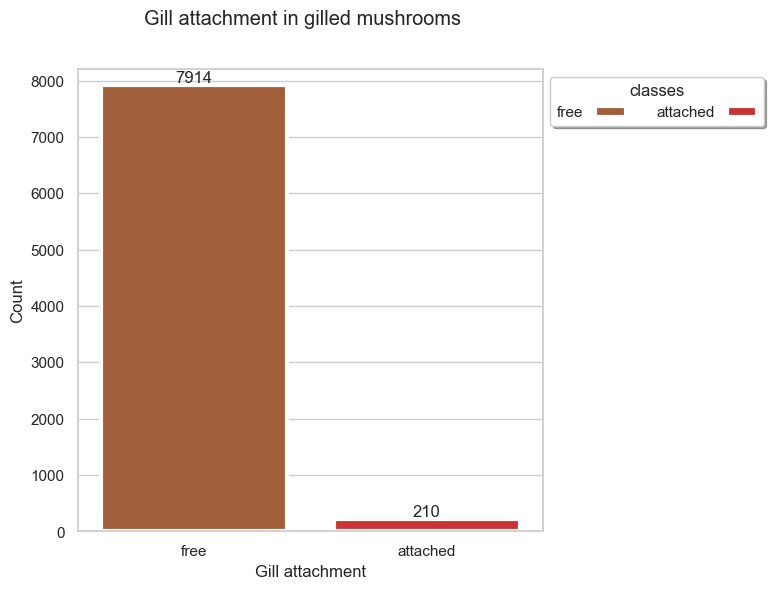

In [21]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Gill attachment in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["gill attachment"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "gill attachment", 
              linewidth = 3, hue = "gill attachment", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Gill attachment")
axes.set_ylabel("Count")
plt.legend(title = "classes", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 8200)
plt.show()

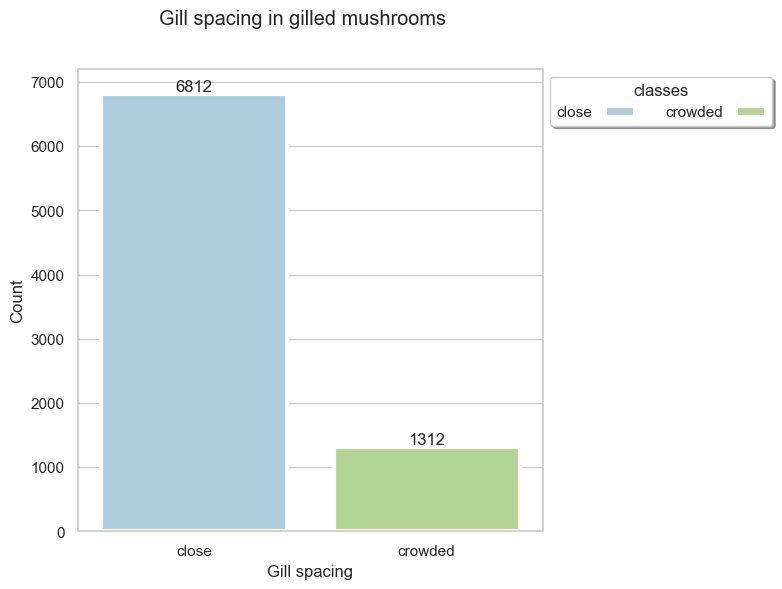

In [22]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Gill spacing in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["gill spacing"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "gill spacing", 
              linewidth = 3, hue = "gill spacing", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Gill spacing")
axes.set_ylabel("Count")
plt.legend(title = "classes", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 7200)
plt.show()

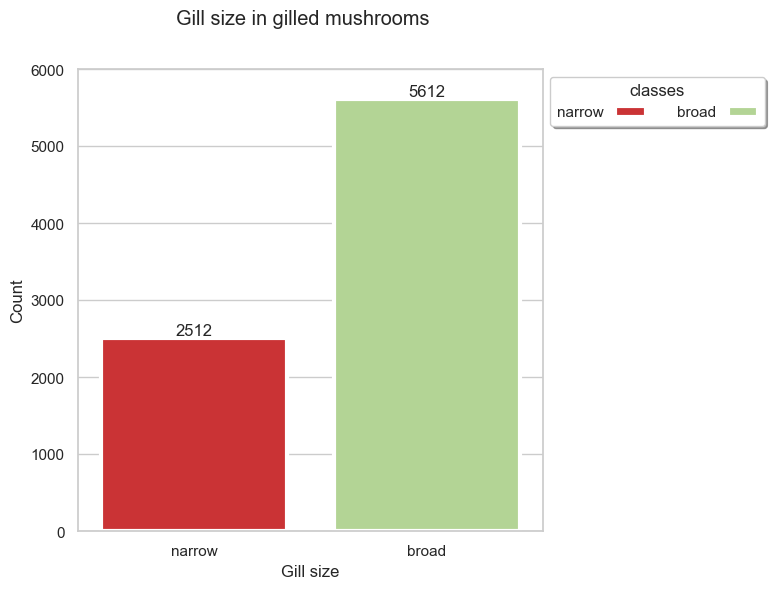

In [23]:
fig, axes = plt.subplots(figsize = (6, 6))
fig.suptitle("Gill size in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["gill size"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "gill size", 
              linewidth = 3, hue = "gill size", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Gill size")
axes.set_ylabel("Count")
plt.legend(title = "classes", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 6000)
plt.show()

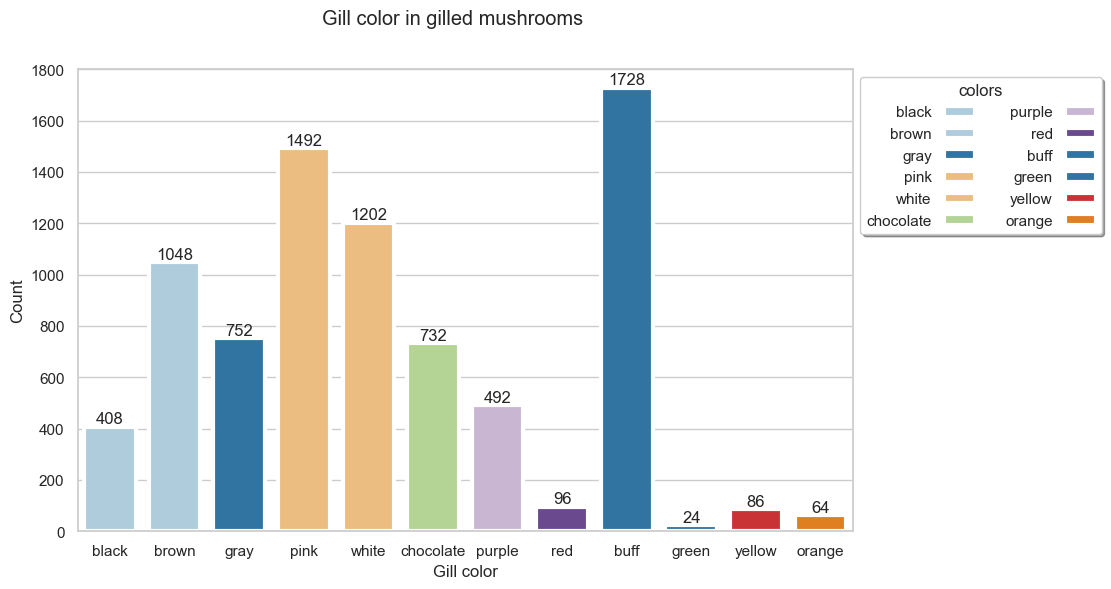

In [24]:
fig, axes = plt.subplots(figsize = (10, 6))
fig.suptitle("Gill color in gilled mushrooms")
sns.set_theme(style = "whitegrid")
ranks = mushroom["gill color"].sort_values().index
palette = sns.color_palette("Paired", len(ranks))
sns.countplot(ax = axes, data = mushroom, x = "gill color", 
              linewidth = 3, hue = "gill color", 
              palette = np.array(palette)[ranks], dodge = False)
axes.set_xlabel("Gill color")
axes.set_ylabel("Count")
plt.legend(title = "colors", 
           bbox_to_anchor = (1, 1), 
           frameon = True, 
           ncol = 2,
           markerfirst = False,
           shadow = True)
for container in axes.containers:
    axes.bar_label(container)
plt.ylim(0, 1800)
plt.show()